# Intorduction to API - Keras


## Background

Intorduction to Neural Network and Frameworks

http://localhost:8888/notebooks/scaleddeepleader/Deep%20Learning/Presentation/Intro.ipynb

### Concepts
1. Input Layer
    a. Neurons are the input features to train.
    b. weights are the influence of each input on the outcome.
    c: Bias account for patterns not solely dictated by input data.
2. Hidden Layer
    a. Neurons are the processing steps to understand the relationship in the data
    b. weights are still the influence after each processing steps
    c: Activation functions introduces non linearity in the hidden layers (ReLU, Tanh)
3. Output Layer
    a. Neurons depends on the output format (binary, multiclass, regression)
    b. Activation function again depends on the output format  (sigmoid, softmax, linear)

### Programming Steps
1. Data preparation
    a. Data cleanup and conversions
    b. Normalize the data - Avoid feature bias, speed up optimization
    c. Arrange in vector and matrix (shape and re-shape)
    d. Split into train and test
2. Build the model
    a. Build each layer and number of neurons.
    b. define activation functions.
3. Train the model
    <ul>
    <li>Initialize the weights</li>
    <li>Forward propagation: matrix multiplication of weights and input features and apply activation function at each hidden layer. At the out layer, apply activation function to predict the output</li>
    <li>Loss functions: measure the difference between output and predictions. (MSE, Cross-entropy loss)</li>
    <li>Back propogation: Think of back propogation is a process to calulate the magnitude and direction of weight changes at each neuron to reduce the loss.</li>
    <li>Optimization function: Take the weight change calculated by back propagation and just reduce from original weight (GD) or apply difference different functions to calculate new weights (such as SGD, Adagrad, Adam)</li>
    <li>Epoch: Run the above steps n times. </li>
    </ul>
4. Evaluate the model
    a. Evalaute the model using test data.
    

## Frameworks


<table>
    <tr>
        <th>From the scratch</th>
        <th>Low level libraries</th>
        <th>API</th>
        <th>Models</th>
    </tr>
    <tr>
        <td>
            Write all the steps using your preferred programming language. 
            1. Complex
            2. Scale for large dataset
            3. Effeciecy on data handling and calculation during multiple layers
            4. Debugging
            https://github.com/Dev-Gaju/NNFS-book-with-Implementation/blob/master/README.md
        </td>
        <td>
            Low-level libraries or framework come to rescue. Tensorflow (Google), PyTorch(Meta), JAX
            Solved for scalbility, effeciency
            Reduce the complexity, but the learning curve is bit high and debugging is hard
        </td>
        <td>
            API runs on top of Low level libraries.
            Keras is one of the popular API, which we will use in demo
        </td>
        <td>
            Pre trained Models
        </td>        
    </tr>
    
    
</table>

## Handwriting recognition

The standard example for machine learning these days is the MNIST data set, a collection of 70,000 handwriting samples of the numbers 0-9. Our challenge - to predict which number each handwritten image represents.


## Keras Version

### Step1: Data Preparation

In [1]:
# Prepare MNIST data.
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

#### Step 1a: Reshape and Batch

In [3]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)

#### Step 1.b: Cleanups and numeric conversion

In [4]:
# Convert to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

#### Step 1c: Normalize

In [5]:
train_images /= 255
test_images /= 255

In [6]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

### Step2: Build the Model

#### Step2.a: Create model layers

In [7]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add()
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


#### Step2.b: Compile model with function names

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

#### Step3: Train the Model

In [11]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/10


2024-02-25 00:02:24.726562: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


600/600 - 2s - loss: 0.2379 - accuracy: 0.9301 - val_loss: 0.1272 - val_accuracy: 0.9615 - 2s/epoch - 3ms/step
Epoch 2/10
600/600 - 1s - loss: 0.0967 - accuracy: 0.9712 - val_loss: 0.0817 - val_accuracy: 0.9742 - 1s/epoch - 2ms/step
Epoch 3/10
600/600 - 1s - loss: 0.0637 - accuracy: 0.9811 - val_loss: 0.0741 - val_accuracy: 0.9777 - 1s/epoch - 2ms/step
Epoch 4/10
600/600 - 1s - loss: 0.0466 - accuracy: 0.9858 - val_loss: 0.0695 - val_accuracy: 0.9787 - 1s/epoch - 2ms/step
Epoch 5/10
600/600 - 1s - loss: 0.0352 - accuracy: 0.9894 - val_loss: 0.0731 - val_accuracy: 0.9776 - 1s/epoch - 2ms/step
Epoch 6/10
600/600 - 1s - loss: 0.0275 - accuracy: 0.9917 - val_loss: 0.0661 - val_accuracy: 0.9810 - 1s/epoch - 2ms/step
Epoch 7/10
600/600 - 1s - loss: 0.0212 - accuracy: 0.9937 - val_loss: 0.0635 - val_accuracy: 0.9827 - 1s/epoch - 2ms/step
Epoch 8/10
600/600 - 1s - loss: 0.0160 - accuracy: 0.9954 - val_loss: 0.0674 - val_accuracy: 0.9813 - 1s/epoch - 2ms/step
Epoch 9/10
600/600 - 1s - loss: 0.0

In [12]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07393631339073181
Test accuracy: 0.9815999865531921


1/1 [==============================] - 0s 7ms/step


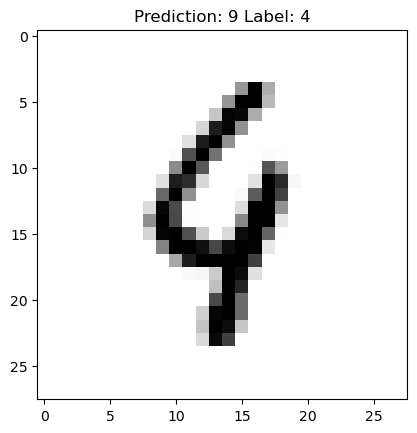

1/1 [==============================] - 0s 7ms/step


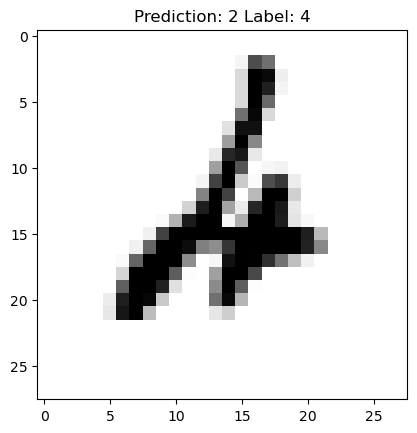

1/1 [==============================] - 0s 8ms/step


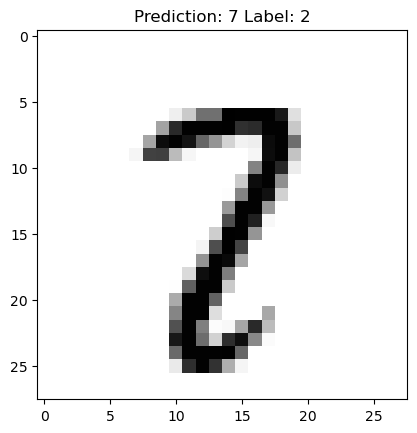

1/1 [==============================] - 0s 7ms/step


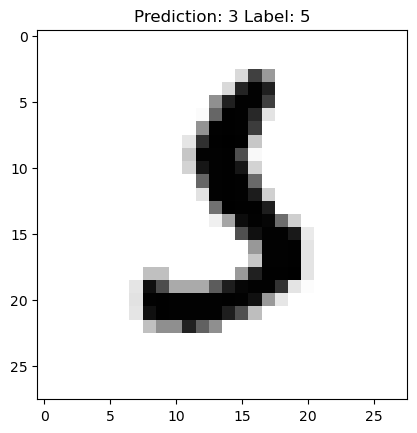

1/1 [==============================] - 0s 6ms/step


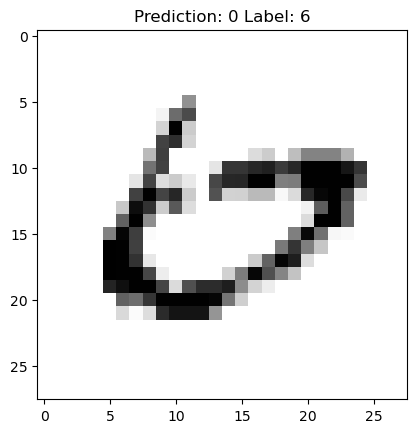

1/1 [==============================] - 0s 6ms/step


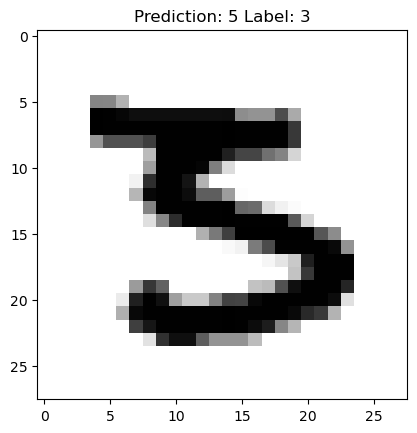

1/1 [==============================] - 0s 7ms/step


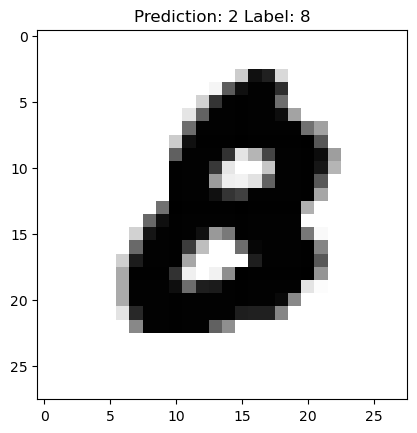

1/1 [==============================] - 0s 7ms/step


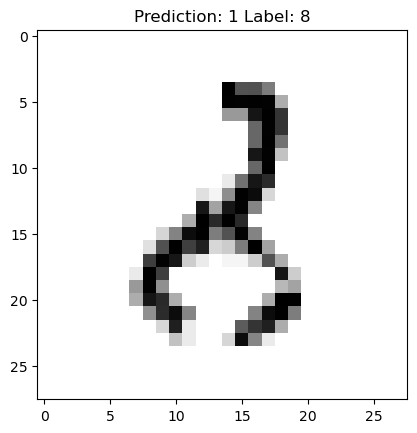

1/1 [==============================] - 0s 7ms/step


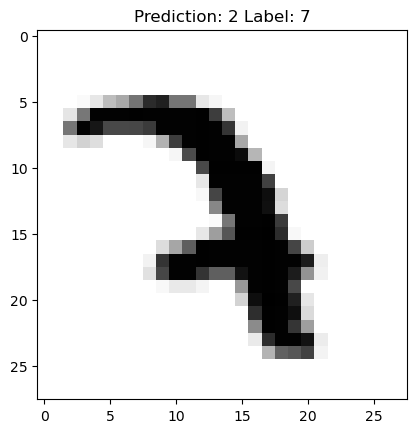

1/1 [==============================] - 0s 7ms/step


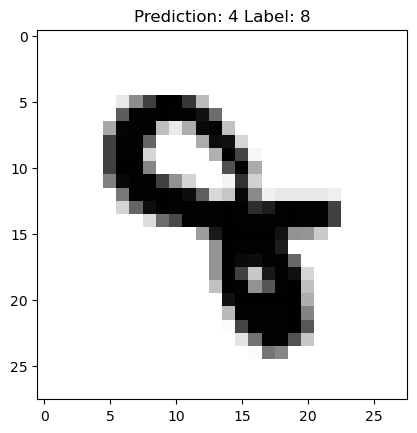

1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 7ms/step


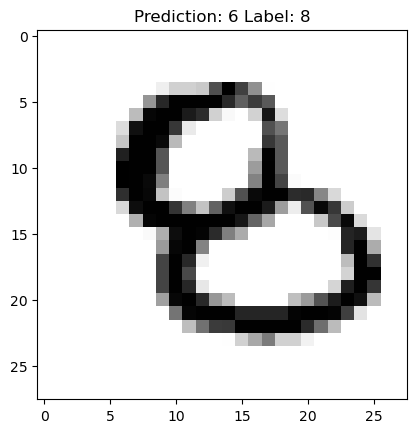

1/1 [==============================] - 0s 6ms/step


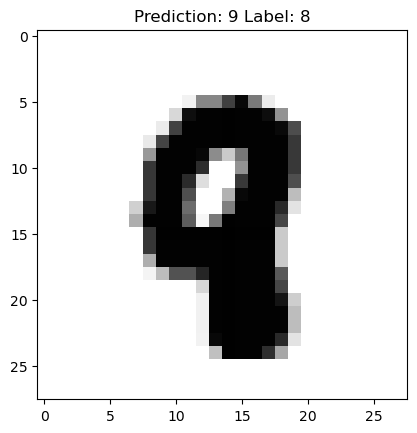

1/1 [==============================] - 0s 7ms/step


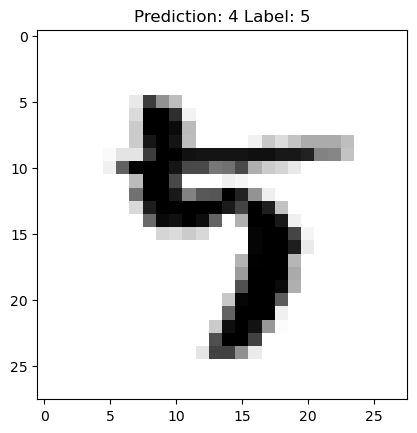

1/1 [==============================] - 0s 7ms/step


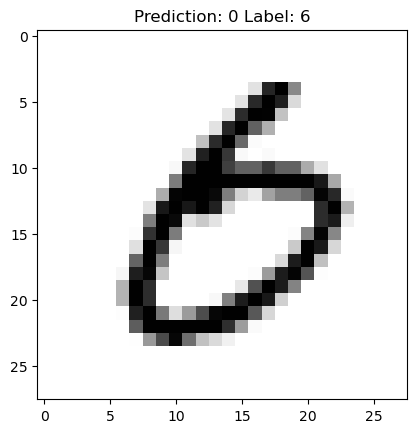

1/1 [==============================] - 0s 6ms/step


In [13]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()